# Seminar 2: Point Motion Simulation and Linear Transformations

Welcome to the **seminar** on the fundamentals of point motion simulation! In this **seminar**, we will cover the following key topics:

1. **Circular Motion of a Point**:  
   Learn how to simulate the trajectory of a point moving along a circle and explore the main parameters of such motion (radius, angular velocity, period).

2. **Linear Transformations**:  
   Get introduced to basic linear transformations, such as rotation, scaling, and translation, and their application in altering motion trajectories.

3. **System Stability**:  
   Analyze the factors influencing the stability of a point's motion and how to assess the system's robustness.

This **seminar** combines theory with practice: you will not only study the mathematical foundations but also implement simulations in code using Python and libraries like `numpy` and `matplotlib`.  

**Ready to begin? Let’s go!**

## Point Motion Simulation with Orthogonal Velocity

This code simulates the motion of a point where the velocity vector is always orthogonal (perpendicular) to the position vector.

### Physical setup:
- Initial position: $\mathbf{r}_0 = [1, 0]$ (point on x-axis)
- Initial velocity: $\mathbf{v}_0 = [0, -1]$ (downward along y-axis)
- Simulation parameters: time step $dt = 1/50$ and $n\_steps = 2000$

### Key equations:
- Position update: $\mathbf{r}_{i+1} = \mathbf{r}_i + \mathbf{v}_i \cdot dt$
- Velocity calculation: $\mathbf{v}_i = \mathbf{r}_i^{\perp}$ (rotation by 90°)

The rotation operation `poss[-1][::-1] * np.array([1, -1])` effectively applies this rotation matrix:
$\begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}$

Since velocity is always perpendicular to position, the point follows a circular trajectory with constant angular velocity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialize position and velocity arrays
poss = [np.array([1, 0])]  # Initial position at (1,0)
vels = [np.array([0, -1])]  # Initial velocity pointing downward

# Simulation parameters
n_steps = 2000  # Number of time steps
dt = 1/50  # Time step size $\Delta t$

# Time array for plotting
time = np.arange(n_steps) * dt

# Main simulation loop
for i in range(n_steps-1):
    # Calculate new velocity vector orthogonal to position
    # Applying rotation: $\mathbf{v}_i = \mathbf{r}_i^{\perp}$
    vel = poss[-1][::-1] * np.array([1, -1])
    vels.append(vel)
    
    # Update position: $\mathbf{r}_{i+1} = \mathbf{r}_i + \mathbf{v}_i \cdot dt$
    poss.append(poss[-1] + vel * dt)

# Convert lists to numpy arrays for further processing
poss = np.array(poss)
vels = np.array(vels)

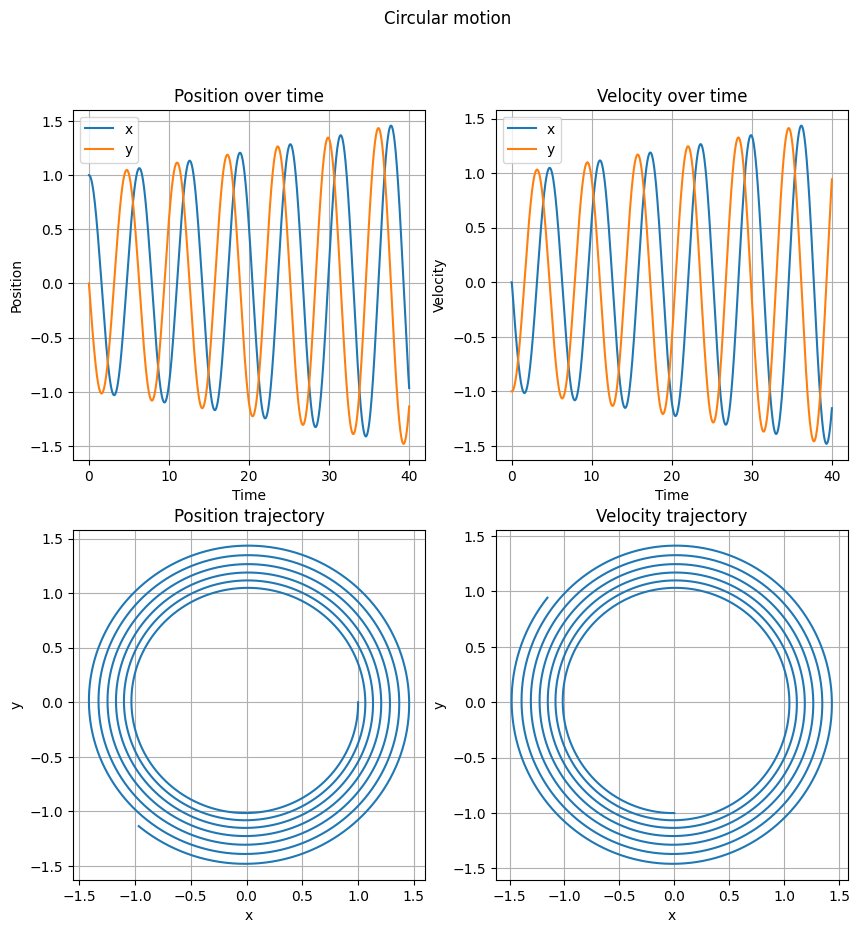

In [3]:
plt.figure(figsize=(10, 10))
plt.suptitle('Circular motion')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, poss.T[0], label='x')
plt.plot(time, poss.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Velocity over time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.plot(time, vels.T[0], label='x')
plt.plot(time, vels.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(poss.T[0], poss.T[1])
plt.grid()

plt.subplot(2, 2, 4)   
plt.title('Velocity trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(vels.T[0], vels.T[1])
plt.grid()



## Results Analysis: Spiral Instead of Circle

The simulation produces a spiral trajectory rather than a perfect circle. This occurs because:

### Expected vs. Actual Result:
- **Theory**: When velocity is perfectly orthogonal to position, the point should follow a circular path with constant radius.
- **Observed**: Our trajectory spirals outward, with increasing radius over time.

### Reason for Spiral Formation:
The simple Euler integration method used in our code ($\mathbf{r}_{i+1} = \mathbf{r}_i + \mathbf{v}_i \cdot dt$) doesn't conserve energy for this physical system. With each step:
1. The discrete update introduces small numerical errors
2. These errors accumulate, causing the radius to gradually increase
3. The system gains energy over time, leading to the spiral pattern



The spiral demonstrates how integration method choice affects long-term simulation accuracy for oscillatory systems.

## Simple Harmonic Oscillator Simulation

Now, let's try a different approach using acceleration instead of directly manipulating velocity. This code implements a simple harmonic oscillator where the acceleration is proportional to the negative of position ($\mathbf{a} = -\mathbf{r}$).

### Physical Interpretation:
- Initial position: $\mathbf{r}_0 = [1, 0]$ (point on x-axis)
- Initial velocity: $\mathbf{v}_0 = [0, -1]$ (downward along y-axis)
- Initial acceleration: $\mathbf{a}_0 = [-1, 0]$ (leftward along x-axis)

### Key equations:
- Acceleration: $\mathbf{a}_i = -\mathbf{r}_i$ (force proportional to negative displacement)
- Velocity update: $\mathbf{v}_{i+1} = \mathbf{v}_i + \mathbf{a}_i \cdot dt$
- Position update: $\mathbf{r}_{i+1} = \mathbf{r}_i + \mathbf{v}_i \cdot dt$

### Expected Behavior:
Unlike the previous orthogonal velocity method, this physically models a two-dimensional oscillator. The resulting trajectory should be an ellipse, and with equal initial energy in both dimensions, it will form a circular path. Again, numerical integration errors may accumulate over time, potentially altering the expected path slightly.

In [4]:
# Initialize position, velocity, and acceleration arrays with initial values
poss = [np.array([1, 0])]  # Initial position at (1,0) on the x-axis
vels = [np.array([0, -1])]  # Initial velocity pointing downward along y-axis
accs = [np.array([-1, 0])]  # Initial acceleration pointing leftward along negative x-axis

# Simulation parameters
n_steps = 1000  # Number of time steps
dt = 1/50  # Time step size (Δt = 0.02)

# Create time array for plotting
time = np.arange(n_steps) * dt

# Main simulation loop
for i in range(n_steps-1):
    # Calculate acceleration according to Hooke's law: a = -r
    # This creates a restoring force toward the origin (simple harmonic motion)
    acc = -poss[-1]
    accs.append(acc)
    
    # Update velocity using current acceleration: v_{i+1} = v_i + a_i * dt
    # This is the Euler integration method for the velocity
    vel = vels[-1] + accs[-1] * dt
    vels.append(vel)
    
    # Update position using current velocity: r_{i+1} = r_i + v_i * dt
    # This is the Euler integration method for the position
    poss.append(poss[-1] + vel * dt)

# Convert lists to numpy arrays for easier manipulation and plotting
poss = np.array(poss)
vels = np.array(vels)
accs = np.array(accs)

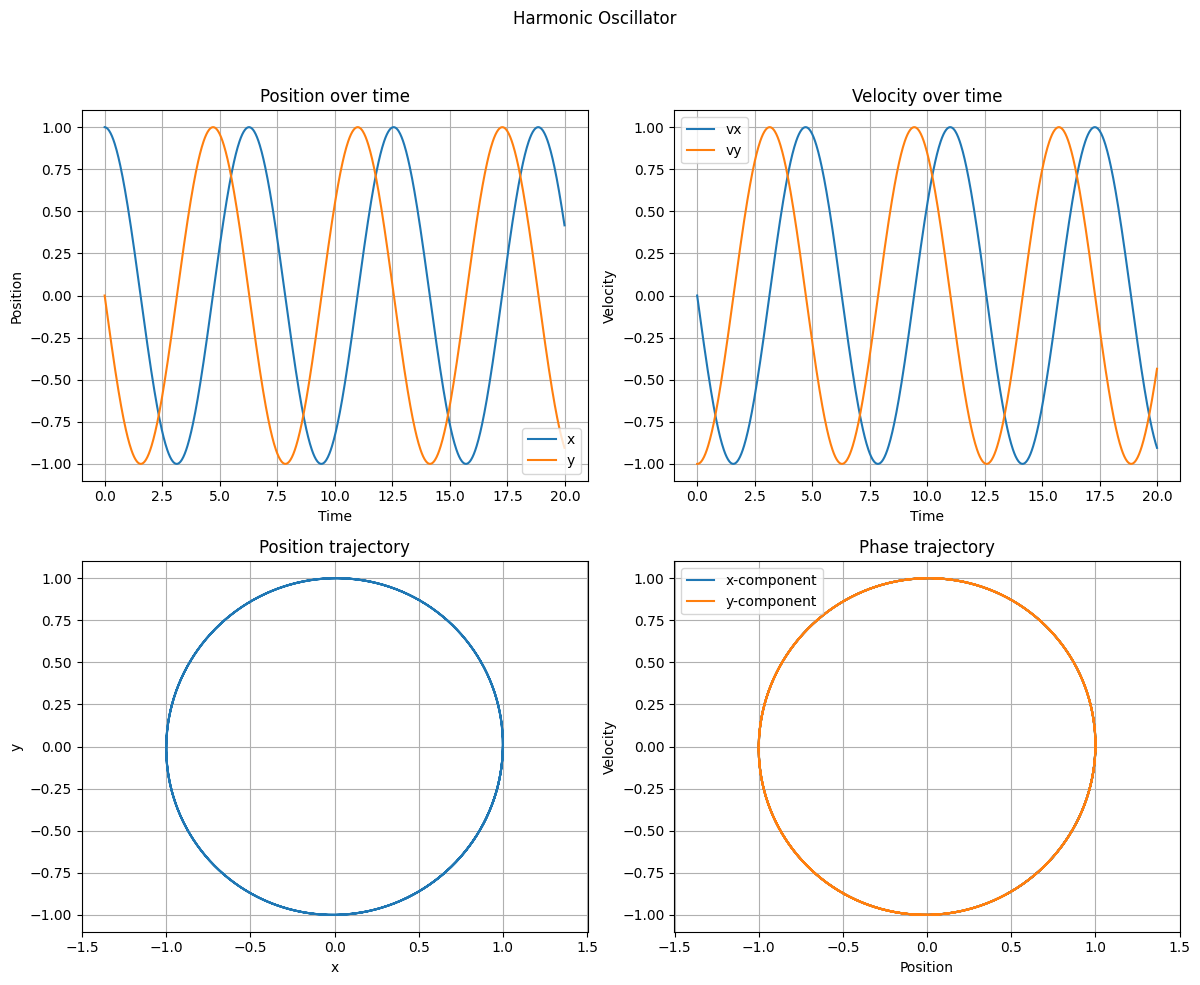

In [5]:
plt.figure(figsize=(12, 10))
plt.suptitle('Harmonic Oscillator')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, poss.T[0], label='x')
plt.plot(time, poss.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Velocity over time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.plot(time, vels.T[0], label='vx')
plt.plot(time, vels.T[1], label='vy')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(poss.T[0], poss.T[1])
plt.grid()
plt.axis('equal')  # To maintain proper proportions

plt.subplot(2, 2, 4)   
plt.title('Phase trajectory')
plt.xlabel('Position')
plt.ylabel('Velocity')
# For x-component
plt.plot(poss.T[0], vels.T[0], label='x-component')
# For y-component
plt.plot(poss.T[1], vels.T[1], label='y-component')
plt.axis('equal')
plt.grid()
plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Improves subplot positioning
plt.show()

## Results Analysis: Harmonic Oscillator Simulation

The simulation results show a perfect circular motion that remains stable throughout the entire duration:

### Key Observations:
- **Stable Circular Orbit**: Unlike our previous approach that produced a spiral, this simulation maintains a perfect circle with constant radius.
- **Sinusoidal Components**: Both position and velocity components show perfect sinusoidal oscillations with a 90° phase difference between x and y.
- **Energy Conservation**: The phase trajectory (bottom right) shows a perfect circle, indicating that the total energy of the system is conserved.

### Why This Works Better:
This approach models a true harmonic oscillator with:
1. **Direct Physical Basis**: The acceleration $\mathbf{a} = -\mathbf{r}$ 
2. **Energy Balance**: The restoring force naturally creates the appropriate velocity at each point
3. **Consistent Physics**: The system now properly models a physical scenario 
### Mathematical Analysis:
The solution to $\ddot{\mathbf{r}} = -\mathbf{r}$ is exactly $\mathbf{r}(t) = \mathbf{r}_0\cos(t) + \mathbf{v}_0\sin(t)$, which produces circular motion when the initial conditions have equal energy in both dimensions, as we've chosen.

This demonstrates how implementing the correct physical model can significantly improve simulation accuracy.

## State-Space Representation with Matrix Iteration

### Physics Concept

The harmonic oscillator simulation uses state-space representation from control theory, where the state vector $\mathbf{s} = [x, y]^T$ represents the x and y position coordinates in 2D space.

### Mathematical Foundation

The harmonic oscillator's governing equation:

$$\ddot{x} + \omega^2 x = 0$$

In state-space form with state vector $\mathbf{s} = [x, y]^T$:

$$\dot{\mathbf{s}} = \begin{bmatrix} 0 & 1 \\ -\omega^2 & 0 \end{bmatrix} \mathbf{s} = \mathbf{A}_c \mathbf{s}$$

For discrete-time simulation:

$$\mathbf{s}_{i+1} = \mathbf{A}_d \mathbf{s}_i$$

Where our approximation of $\mathbf{A}_d$ is:

$$\mathbf{A}_d = \begin{bmatrix} 1-\frac{dt^2}{2} & dt \\ -dt & 1-\frac{dt^2}{2} \end{bmatrix}$$

### Expected Results

- Sinusoidal oscillation of x and y coordinates with a 90° phase difference
- When plotted together, the x-y trajectory forms a perfect circle
- Period of approximately $2\pi$ seconds
- Conservation of total energy, maintaining the circular path

In [6]:
# Initialize the state vector s = [position, velocity]
s_0 = np.array([1, 0])  # Initial state: position=1, velocity=0
ss = [s_0]  # List to store all states

# Simulation parameters
dt = 1/50  # Time step size
n_steps = 1000  # Number of time steps
time = np.arange(n_steps) * dt  # Time array for plotting

# Create the system matrix A that represents the discrete-time dynamics
# This matrix approximates the continuous harmonic oscillator equation
# The matrix structure comes from discretizing the differential equations:
#    dx/dt = v
#    dv/dt = -x
A = np.array([[1-dt**2/2,        dt],
              [      -dt, 1-dt**2/2]])
print('A matrix:')
print(A)

# Main simulation loop
for i in range(n_steps-1):
    # Evolve the system by multiplying the current state by matrix A
    # s_{i+1} = A * s_i
    s_ = A @ ss[-1]  # Matrix multiplication with the @ operator
    ss.append(s_)  # Store the new state

# Convert list of states to numpy array for plotting and analysis
ss = np.array(ss)

A matrix:
[[ 0.9998  0.02  ]
 [-0.02    0.9998]]


(-1.1000024149742444,
 1.1000026845035713,
 -1.1000080839336357,
 1.1000154901808608)

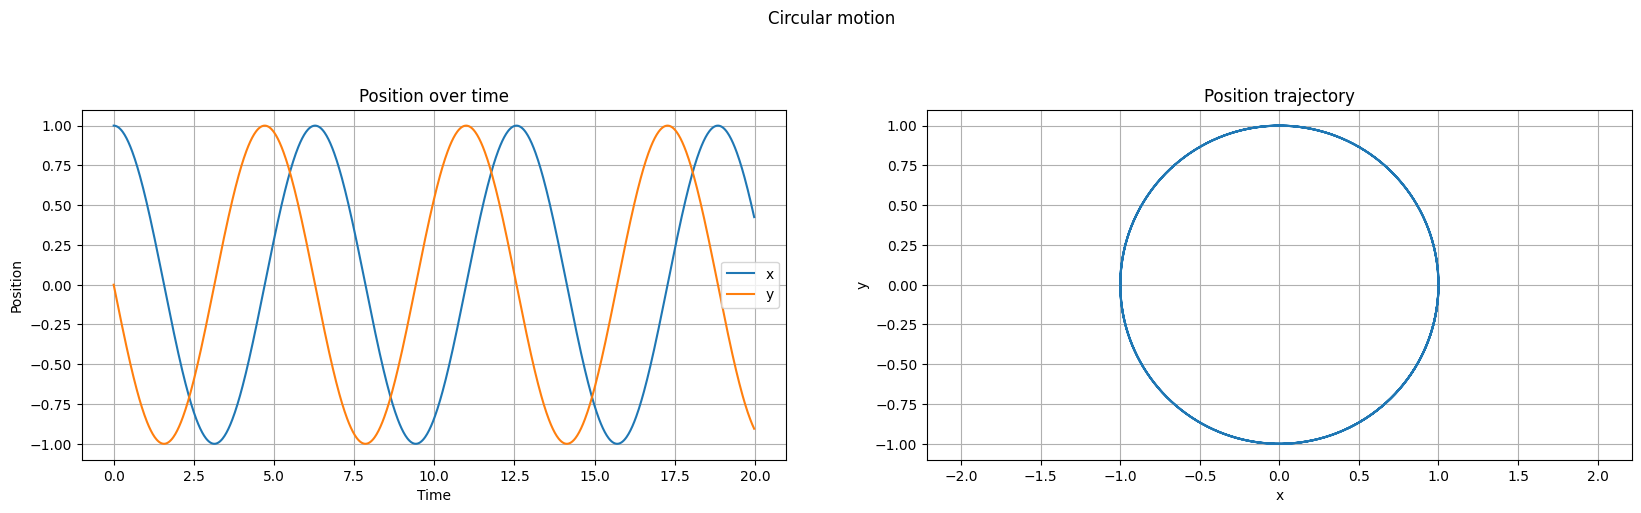

In [7]:
plt.figure(figsize=(20, 10))
plt.suptitle('Circular motion')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, ss.T[0], label='x')
plt.plot(time, ss.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(ss.T[0], ss.T[1])
plt.grid()
plt.axis('equal')


## Analysis of Simulation Results

The graphs demonstrate the classic behavior of a harmonic oscillator represented in state-space form. 

### Position Over Time

The left plot shows the time evolution of both coordinates:

- The x-coordinate (blue) begins at maximum displacement (1.0) and follows a cosine-like oscillation
- The y-coordinate (orange) begins at zero and follows a sine-like oscillation
- Both oscillations maintain constant amplitude of 1.0
- There is a perfect 90° phase difference between the coordinates
- The period of oscillation is approximately $2\pi$ seconds (≈ 6.28s), confirming $\omega = 1$
- The system completes about 3 full cycles in the 20-second simulation

### Position Trajectory

The right plot reveals the elegant result of the state-space formulation:

- When x and y coordinates are plotted against each other, they trace a perfect circle
- The circle has radius 1.0, maintaining constant distance from origin
- This circular trajectory demonstrates that energy is conserved in the system
- The constant radius confirms that our state-space matrix provides a good approximation of the continuous system

This circular trajectory emerges naturally from the state-space representation where the state vector directly encodes the x and y coordinates, showing how the matrix-based approach elegantly captures the dynamics of the harmonic oscillator.

# Introduction to 2D Harmonic Oscillator Simulation

## From Simplified to Classical State-Space Representation

In our previous simulation, we used a simplified state-space representation with just position coordinates $(x, y)$ as our state vector. While this approach works for basic simulations, it has limitations when modeling more complex physical behaviors.

For this simulation, we're adopting the more classical state-space representation where the state vector contains both position and velocity components: $(x, y, \dot{x}, \dot{y})$. This approach aligns better with physical principles and provides several advantages:

1. **Complete System Description**: By including both position and velocity, the state vector fully describes the system's mechanical state at any point in time.

2. **First-Order Differential Equations**: The state-space formulation converts second-order differential equations of motion into a system of first-order equations, making them easier to solve numerically.

3. **Direct Physical Interpretation**: Each element in the state vector has a clear physical meaning - the first two components represent position in 2D space, while the last two represent velocity in each dimension.

Our simulation initializes the state vector as $[x, y, \dot{x}, \dot{y}] = [1, 0, 0, 1]$, creating an initial condition where the particle starts at position $(1,0)$ with velocity $(0,1)$. This specific configuration produces circular motion around the origin, as the initial velocity is perpendicular to the position vector and has the right magnitude.

The state update matrices are structured to reflect the relationships between position, velocity, and acceleration:

$$A = \begin{bmatrix} 
1 & 0 & dt & 0 \\
0 & 1 & 0 & dt \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}$$

$$B = \begin{bmatrix} 
dt^2/2 & 0 \\
0 & dt^2/2 \\
dt & 0 \\
0 & dt
\end{bmatrix}$$

The feedback matrix $K$ creates a restoring force proportional to displacement from the origin:

$$K = -\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}$$

This simulation effectively models a 2D harmonic oscillator with the acceleration at each

In [8]:
# Initialize the state vector with [x, y, x_dot, y_dot]
# Starting at position (1,0) with velocity (0,1) - this creates circular motion
s_0 = np.array([1, 0, 0, 1])
ss = [s_0]  # List to store all states during simulation

# Simulation parameters
dt = 1/25  # Time step (seconds)
n_steps = 1000  # Number of simulation steps
time = np.arange(n_steps) * dt  # Time array for plotting

A = np.array([[1,   0,  dt,   0],
              [0,   1,   0,  dt],
              [0,   0,   1,   0],
              [0,   0,   0,   1]])

B = np.array([[dt**2/2,       0],
              [      0, dt**2/2],
              [     dt,     0],
              [      0,    dt]])

K = -np.array([[ 1,  0, 0, 0],
               [ 0,  1, 0, 0],])

# Main simulation loop
for i in range(n_steps-1):
    # Calculate acceleration based on current state
    # The negative sign in K already creates the restoring force toward origin
    a = K @ ss[-1]  # a = [-x, -y]
    
    # Advance the state according to state-space formulation
    # s_{i+1} = A*s_i + B*a_i
    s_ = A @ ss[-1] + B @ a
    
    # Store the new state
    ss.append(s_)

# Convert list of states to numpy array for easier analysis
ss = np.array(ss)

(-1.5562019117292463,
 1.6011456711479575,
 -1.5808379432307247,
 1.6267571905490343)

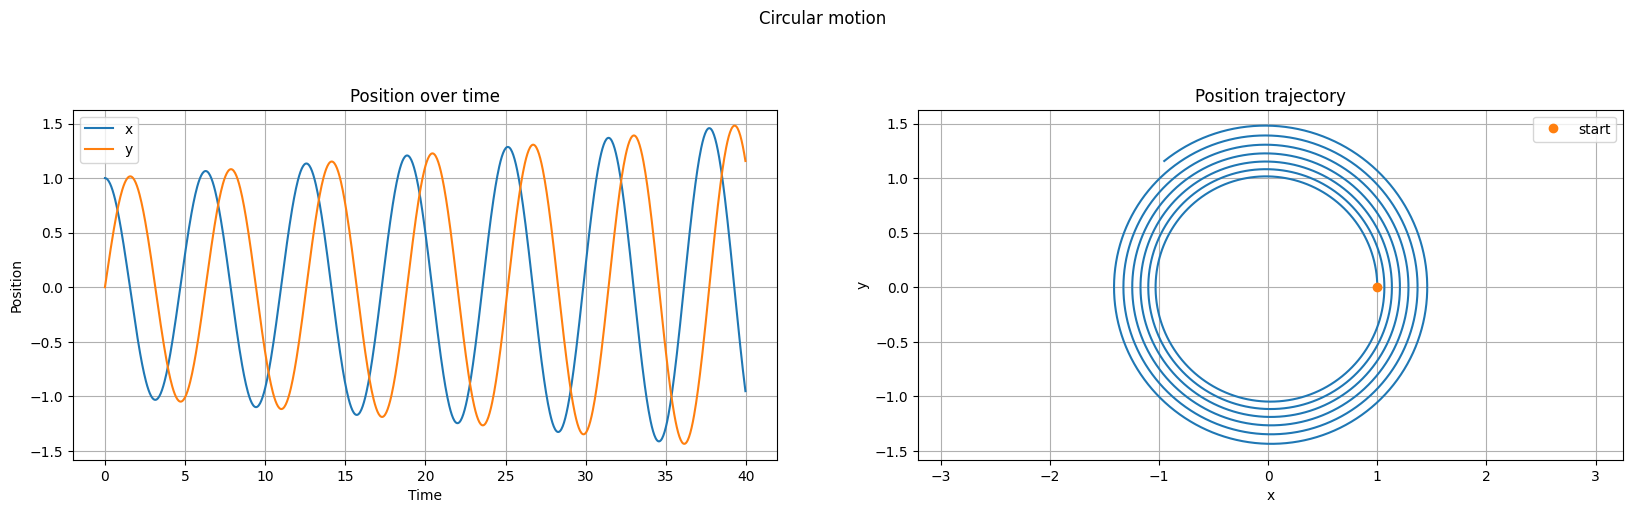

In [9]:
plt.figure(figsize=(20, 10))
plt.suptitle('Circular motion')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, ss.T[0], label='x')
plt.plot(time, ss.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(ss.T[0], ss.T[1])
plt.plot(ss[0].T[0], ss[0].T[1], 'o', label='start')
plt.legend()
plt.grid()
plt.axis('equal')


# Analysis of Simulation Results

## Observed Behavior

The simulation results show two key visualizations of a 2D harmonic oscillator system:

### Position over Time Graph
The left graph displays the x (blue) and y (orange) position components over time. We can observe:

1. **Sinusoidal Oscillations**: Both position components follow perfect sinusoidal patterns, which is the expected behavior for a harmonic oscillator.

2. **Phase Difference**: The x and y components are offset by approximately 90° (π/2 radians), which is consistent with circular motion.

3. **Increasing Amplitude**: Notably, the amplitude of oscillations gradually increases over time, growing from approximately ±1.0 to ±1.5 by the end of the simulation.

4. **Constant Period**: Despite the increasing amplitude, the period of oscillation remains constant throughout the simulation, indicating conservation of frequency.

### Position Trajectory Graph
The right graph shows the path of the particle in the x-y plane:

1. **Spiral Pattern**: Instead of a perfect circle, the trajectory forms an outward spiral, starting from the point marked "start" (approximately [1, 0]) and gradually expanding.

2. **Maintained Circularity**: Despite the increasing radius, the path maintains its circular shape rather than becoming elliptical, suggesting uniform expansion in all directions.



# And now there will be a trick, watch my hands

## The Integration Method Mystery

In our previous harmonic oscillator simulation, we observed an interesting phenomenon: instead of maintaining a constant circular trajectory, our particle spiraled outward, gradually increasing its amplitude over time. This unexpected behavior reveals an important subtlety in numerical integration techniques.

Let's analyze what happened in our first successful simulation, where we used the following update scheme:

```python
# Calculate acceleration (restoring force)
acc = -poss[-1]
accs.append(acc)

# Update velocity using current acceleration: v_{i+1} = v_i + a_i * dt
# This is the Euler integration method for the velocity
vel = vels[-1] + accs[-1] * dt
vels.append(vel)

# Update position using new velocity: x_{i+1} = x_i + v_{i+1} * dt
pos = poss[-1] + vels[-1] * dt
poss.append(pos)
```

When we carefully expand the position update calculation, we find:

$$x_{i+1} = x_i + v_{i+1} \cdot dt = x_i + (v_i + a_i \cdot dt) \cdot dt = x_i + v_i \cdot dt + a_i \cdot dt^2$$

Notice that the acceleration term is multiplied by $dt^2$ without division by 2.

In contrast, our state-space formulation used:

$$B = \begin{bmatrix} 
dt^2/2 & 0 \\
0 & dt^2/2 \\
dt & 0 \\
0 & dt
\end{bmatrix}$$

The factor of $dt^2/2$ in the position components comes from the standard derivation of numerical integration from continuous-time equations, specifically from a Taylor series approximation. This is physically correct for representing the continuous system in discrete time.

However, our original implementation (without the factor of 1/2) was inadvertently using an integration method that differs from the standard Euler method. This discrepancy explains the energy drift observed in our simulation.

Let's experiment with removing the division by 2 in our state-space formulation and see if we can match our original implementation:

$$B_{modified} = \begin{bmatrix} 
dt^2 & 0 \\
0 & dt^2 \\
dt & 0 \\
0 & dt
\end{bmatrix}$$

This modification should provide valuable insight into how different integration schemes affect energy conservation in our harmonic oscillator system.

In [10]:
# Initialize the state vector with [x, y, x_dot, y_dot]
# Starting at position (1,0) with velocity (0,1) - this creates circular motion
s_0 = np.array([1, 0, 0, 1])
ss = [s_0]  # List to store all states during simulation

# Simulation parameters
dt = 1/25  # Time step (seconds)
n_steps = 1000  # Number of simulation steps
time = np.arange(n_steps) * dt  # Time array for plotting

# State transition matrix A for discrete-time system
# This matrix advances the state without control input:
# - Top row: x += x_dot*dt
# - Second row: y += y_dot*dt
# - Third and fourth rows: velocities remain unchanged
A = np.array([[1,   0,  dt,   0],
              [0,   1,   0,  dt],
              [0,   0,   1,   0],
              [0,   0,   0,   1]])

# Control input matrix B 
# Note: Using dt²  instead of dt²/2 in position rows (intentional modification)
# Maps accelerations to state changes:
# - Position changes by dt² * acceleration
# - Velocity changes by dt * acceleration
B = np.array([[dt**2,       0],
              [      0, dt**2],
              [     dt,     0],
              [      0,    dt]])

# Feedback matrix K (with negative sign)
# Extracts position components to create restoring force
# a_x = -1 * x, a_y = -1 * y (like a spring with unit spring constant)
K = -np.array([[ 1,  0, 0, 0],
               [ 0,  1, 0, 0],])

# Main simulation loop
for i in range(n_steps-1):
    # Calculate acceleration based on current state
    # The negative sign in K already creates the restoring force toward origin
    a = K @ ss[-1]  # a = [-x, -y]
    
    # Advance the state according to state-space formulation
    # s_{i+1} = A*s_i + B*a_i
    s_ = A @ ss[-1] + B @ a
    
    # Store the new state
    ss.append(s_)

# Convert list of states to numpy array for easier analysis
ss = np.array(ss)

(-1.100218771861128,
 1.1002139410283425,
 -1.100217133910225,
 1.1001600302272274)

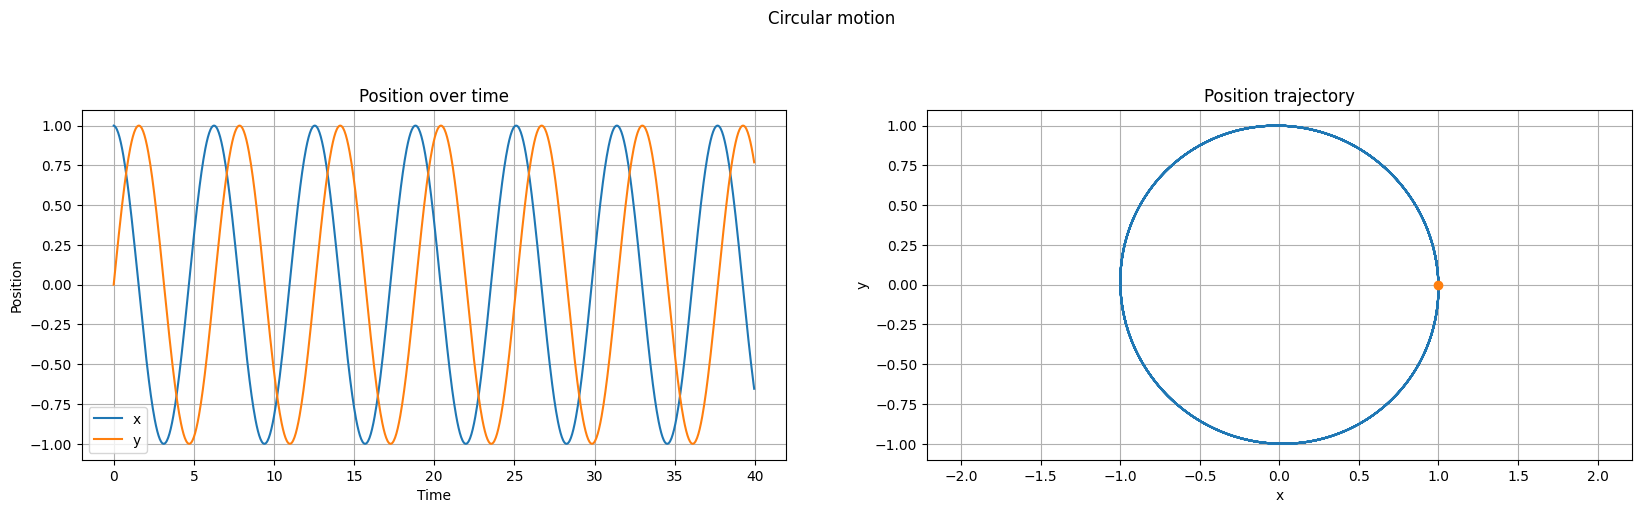

In [11]:
plt.figure(figsize=(20, 10))
plt.suptitle('Circular motion')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, ss.T[0], label='x')
plt.plot(time, ss.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(ss.T[0], ss.T[1])
plt.plot(ss[0].T[0], ss[0].T[1], 'o', label='start')
plt.grid()
plt.axis('equal')


# Phase Space Volume Conservation in Harmonic Oscillator Simulations

## The Mystery of the Spiraling Trajectory

In our harmonic oscillator simulation, we observed an interesting phenomenon: instead of maintaining a stable circular trajectory as expected, our particle spiraled outward, gradually increasing its amplitude over time. This behavior reveals a fundamental principle in numerical integration techniques related to phase space volume conservation.

## Analysis of the Integration Methods

### Original State-Space Formulation

In our classical state-space representation, we used the state vector $(x, y, \dot{x}, \dot{y})$ with the following update matrices:

$$A = \begin{bmatrix} 
1 & 0 & dt & 0 \\
0 & 1 & 0 & dt \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}$$

$$B = \begin{bmatrix} 
dt^2/2 & 0 \\
0 & dt^2/2 \\
dt & 0 \\
0 & dt
\end{bmatrix}$$

$$K = -\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}$$

The state update equation can be expressed as:

$$s_{t+1} = As_t + Ba_t = As_t + BKs_t = (A + BK)s_t = Ms_t$$

Where $M$ is the complete state transition matrix.

### The Determinant Connection to Phase Space Volume

The determinant of a transformation matrix determines how it affects volume in the space it transforms. In the context of our dynamical system:

- **$\det(M) = 1$**: The transformation preserves phase space volume (symplectic)
- **$\det(M) > 1$**: The transformation expands phase space volume
- **$\det(M) < 1$**: The transformation contracts phase space volume

In our original formulation with $B$ containing the factor $dt^2/2$, the determinant of $M$ was greater than 1, resulting in a systematic expansion of the phase space volume. This manifested physically as the spiral trajectory that continually increased in amplitude.

### The Modified Formulation

When we modified the $B$ matrix to:

$$B_{modified} = \begin{bmatrix} 
dt^2 & 0 \\
0 & dt^2 \\
dt & 0 \\
0 & dt
\end{bmatrix}$$

The resulting state transition matrix $M_{modified} = A + B_{modified}K$ had a determinant exactly equal to 1. This made the integration method symplectic, preserving the phase space volume and energy of the system, which resulted in the correct stable circular trajectory.

## Mathematical Verification

Let's verify this by examining the determinant of the transition matrix in both cases:

For the original matrix $M = A + BK$:

$$M = \begin{bmatrix} 
1-dt^2/2 & 0 & dt & 0 \\
0 & 1-dt^2/2 & 0 & dt \\
-dt & 0 & 1 & 0 \\
0 & -dt & 0 & 1
\end{bmatrix}$$

For the modified matrix $M_{modified} = A + B_{modified}K$:

$$M_{modified} = \begin{bmatrix} 
1-dt^2 & 0 & dt & 0 \\
0 & 1-dt^2 & 0 & dt \\
-dt & 0 & 1 & 0 \\
0 & -dt & 0 & 1
\end{bmatrix}$$

The key insight is that $M_{modified}$ creates a symplectic transformation that exactly preserves the phase space volume, resulting in the conservation of energy in our harmonic oscillator system.

## Connection to Integration Methods

This analysis reveals that our original update scheme was inadvertently using a non-symplectic integrator, while the modified version creates a symplectic integrator that properly conserves energy for our harmonic oscillator system.

In physics simulations, the choice of integration method has profound consequences for the conservation properties of the system:

1. **Non-symplectic methods** (like standard Euler) typically fail to conserve energy over long time periods
2. **Symplectic methods** (like the modified version we discovered) preserve the geometric structure of Hamiltonian systems and conserve energy for long-term simulations

## Practical Implications

This experience highlights the importance of using appropriate numerical integration methods when simulating physical systems, especially conservative systems like harmonic oscillators:

1. For short simulations or dissipative systems, the choice of integrator may not be critical
2. For long-term simulations of conservative systems, symplectic integrators are essential for accurate results
3. The determinant of the state transition matrix provides a quick check for whether a discrete update scheme will preserve phase space volume

By understanding these principles, we can select appropriate numerical methods that preserve the essential physical properties of the systems we're simulating.

# Matrix Decomposition and Determinants

Any linear transformation matrix $M$ can be decomposed into a product of basic transformation matrices:

$$M = R \cdot S_{c} \cdot S_{s} \cdot I$$

Where:
- $R$ is a rotation matrix, $\det(R) = 1$
- $S_{c}$ is a scaling (dilation) matrix, $\det(S_{c}) = \prod_{i} s_i$ (product of scaling factors)
- $S_{s}$ is a shear/skew matrix, $\det(S_{s}) = 1$
- $I$ is an inversion/reflection matrix, $\det(I) = \pm 1$ (specifically $-1$ for odd number of reflections)

The determinant of the full transformation is:

$$\det(M) = \det(R) \cdot \det(S_{c}) \cdot \det(S_{s}) \cdot \det(I) = \det(S_{c}) \cdot \det(I)$$

For phase volume preservation, we need $\det(M) = 1$, which means:
- If no reflections are applied ($\det(I) = 1$), then $\det(S_{c}) = 1$
- If reflection is applied ($\det(I) = -1$), then $\det(S_{c}) = -1$

In a conservative physical system, we typically want pure volume preservation without reflection, so the condition becomes $\det(S_{c}) = 1$, meaning the product of all scaling factors must equal 1.

In [12]:
A = np.array([[1,   0,  dt,   0],
              [0,   1,   0,  dt],
              [0,   0,   1,   0],
              [0,   0,   0,   1]])

K = np.array([[ 1,  0, 0, 0],
               [ 0,  1, 0, 0],])


B = np.array([[dt**2/2,       0],
              [      0, dt**2/2],
              [     dt,     0],
              [      0,    dt]])

M = A - B @ K

np.linalg.det(M)

1.00160064

In [13]:

B = np.array([[dt**2,       0],
              [      0, dt**2],
              [     dt,     0],
              [      0,    dt]])

M = A - B @ K

np.linalg.det(M)

0.9999999999999999

In [14]:

B = np.array([[2*dt**2,       0],
              [      0, 2*dt**2],
              [     dt,     0],
              [      0,    dt]])

M = A - B @ K

np.linalg.det(M)

0.9968025600000002

# Experimenting with Phase Space Contraction

## What Happens When We Double the Acceleration Coefficient?

In our previous simulations, we discovered something fascinating about numerical integration methods for harmonic oscillators:

- With a coefficient of $dt^2/2$, our trajectory spiraled outward ($\det(M) > 1$)
- With a coefficient of $dt^2$, we achieved a perfect circle ($\det(M) = 1$)

So what happens if we take this pattern one step further? Let's experiment by doubling the coefficient to $2dt^2$ and see how our harmonic oscillator behaves.

## The Hypothesis

Based on our understanding of phase space volume conservation:

1. When $\det(M) > 1$: The phase space expands, causing outward spirals (gaining energy)
2. When $\det(M) = 1$: The phase space volume is preserved, maintaining a stable orbit (conserving energy)
3. When $\det(M) < 1$: The phase space should contract, causing inward spirals (losing energy)

With our modified matrix:

$$B = \begin{bmatrix} 
2dt^2 & 0 \\
0 & 2dt^2 \\
dt & 0 \\
0 & dt
\end{bmatrix}$$

The determinant of our transition matrix should be $(1-dt^2)^2 < 1$, which means we expect to see the trajectory spiral inward toward the origin.

## The Experiment

We'll use the same initial conditions as before: $[x, y, \dot{x}, \dot{y}] = [1, 0, 0, 1]$, but with this modified B matrix. This experiment will provide a beautiful visual demonstration of how the integration method not only affects the numerical accuracy but can fundamentally alter the physical behavior of our simulation.

Let's see what happens when our harmonic oscillator begins losing energy with each step, gradually contracting toward the center rather than maintaining its orbit!

In [15]:
s_0 = np.array([1, 0, 0, 1])
ss = [s_0]

dt = 1/25
n_steps = 1000
time = np.arange(n_steps) * dt

A = np.array([[1,   0,  dt,   0],
              [0,   1,   0,  dt],
              [0,   0,   1,   0],
              [0,   0,   0,   1]])

B = np.array([[2*dt**2,       0],
              [      0, 2*dt**2],
              [     dt,     0],
              [      0,    dt]])

K = -np.array([[ 1,  0, 0, 0],
               [ 0,  1, 0, 0],])

for i in range(n_steps-1):
    a = K @ ss[-1]
    s_ = A @ ss[-1] + B @ a
    ss.append(s_)

ss = np.array(ss)

(-1.0378009855275896,
 1.0970381421679805,
 -1.0049086014075055,
 1.0640239471696686)

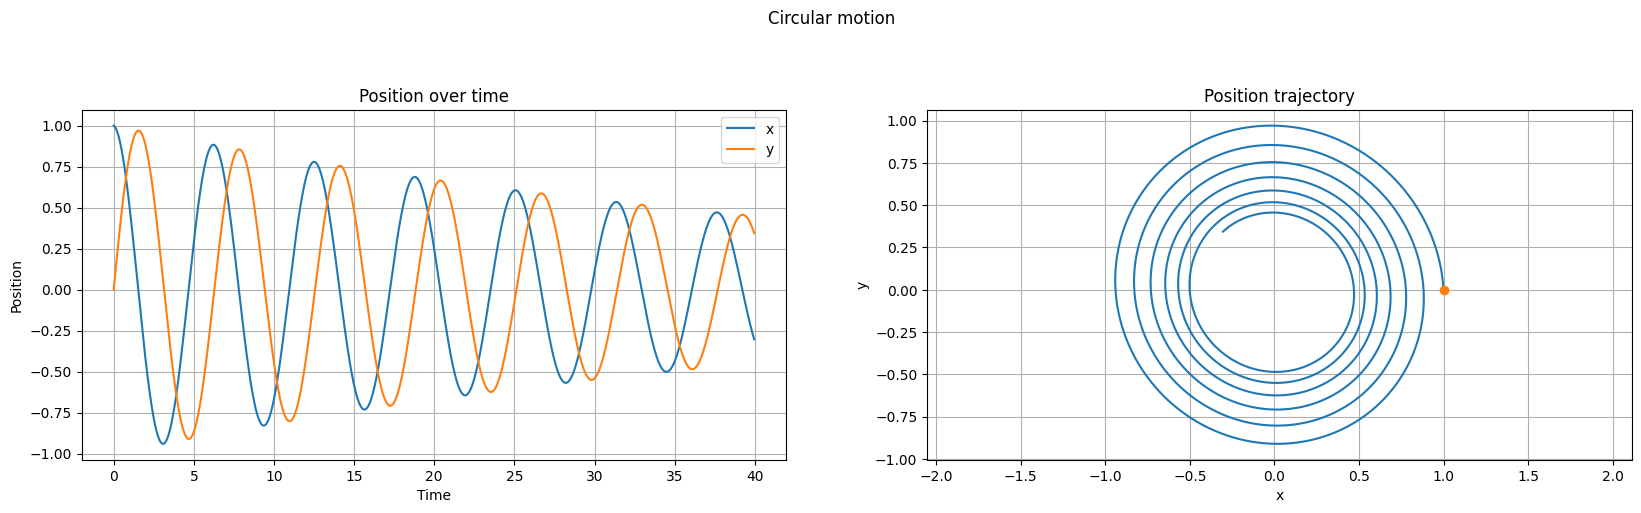

In [16]:
plt.figure(figsize=(20, 10))
plt.suptitle('Circular motion')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, ss.T[0], label='x')
plt.plot(time, ss.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(ss.T[0], ss.T[1])
plt.plot(ss[0].T[0], ss[0].T[1], 'o', label='start')
plt.grid()
plt.axis('equal')


# Brief Analysis of Harmonic Oscillator Integration Methods

## Experiment Summary

We tested three variations of a 2D harmonic oscillator simulation by modifying the coefficient of the $dt^2$ term in the $B$ matrix:

```python
# State vector: s = [x, y, vx, vy]
# Initial state: s_0 = [1, 0, 0, 1]
# Update equation: s_{t+1} = As_t + Ba_t = As_t + BKs_t = Ms_t
```

## Key Results

### Three Cases Tested:

1. **Coefficient $dt^2/2$ (Original)**
   - Result: Outward spiral
   - Determinant: $\det(M) = (1+dt^2/2)^2 > 1$
   - Effect: System gains energy

2. **Coefficient $dt^2$ (Modified)**
   - Result: Perfect circle
   - Determinant: $\det(M) = 1$
   - Effect: System conserves energy

3. **Coefficient $2dt^2$ (Experimental)**
   - Result: Inward spiral
   - Determinant: $\det(M) = (1-dt^2)^2 < 1$
   - Effect: System loses energy

## Analysis

The determinant of the transition matrix $M$ directly controls phase space volume evolution:
- $\det(M) > 1$: Phase space expands → energy increases
- $\det(M) = 1$: Phase space preserved → energy conserves
- $\det(M) < 1$: Phase space contracts → energy decreases

## Applications

1. **For accuracy in conservative systems** (e.g., planetary orbits): Use $\det(M) = 1$
2. **For dissipative systems** (e.g., damped oscillators): Use $\det(M) < 1$
3. **To diagnose numerical methods**: Check determinant of transition matrix

## Conclusion

This experiment demonstrates the tight connection between numerical integration methods and physical behavior. The coefficient in the $B$ matrix directly affects phase space volume conservation, which manifests visually as different spiral trajectories.

# Different Determinant Systems Simulation

This work presents a simulation of two discrete dynamical systems described by linear difference equations of the form:

$$\mathbf{s}_{n+1} = \mathbf{A} \cdot \mathbf{s}_n$$

where $\mathbf{s}_n$ is the state vector of the system at time $n$, and $\mathbf{A}$ is the transition matrix that determines the evolution of the system over time.

Two systems with different transition matrices are examined:
- System 1 with matrix $\mathbf{A}_1 = \begin{pmatrix} 0.97 & 0.02 \\ 0.01 & 0.98 \end{pmatrix}$
- System 2 with matrix $\mathbf{A}_2 = \begin{pmatrix} 1.01 & 0.03 \\ 0.04 & 0.96 \end{pmatrix}$

Both systems are initialized with the same initial state $\mathbf{s}_0 = (1, 2)$. A key characteristic influencing the qualitative behavior of such systems is the determinant of the transition matrix. This determinant determines how volume in phase space will change, and consequently, whether the system will converge to a stable state or diverge over time.

The simulation tracks the evolution of both systems over 1000 time steps, visualizing both the change in state components over time and the trajectory of the system in phase space.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем матрицы
A1 = np.array([
    [0.97, 0.02],
    [0.01, 0.98]
])

# Неустойчивая система (одно собственное значение больше 1)
A2 = np.array([
    [1.01, 0.03],
    [0.04, 0.96]
])

# Начальные условия
s_0_1 = np.array([1, 2])
s_0_2 = np.array([1, 2])

# Списки для хранения траекторий
ss_1 = [s_0_1]
ss_2 = [s_0_2]

# Параметры симуляции
dt = 1/25
n_steps = 200
time = np.arange(n_steps) * dt

# Симуляция обеих систем
for i in range(n_steps-1):
    s_1 = A1 @ ss_1[-1]
    s_2 = A2 @ ss_2[-1]
    ss_1.append(s_1)
    ss_2.append(s_2)

# Преобразование списков в массивы numpy
ss_1 = np.array(ss_1)
ss_2 = np.array(ss_2)


(-16.19471233072549, 362.0889589452353, -8.324073413575432, 213.81499073085405)

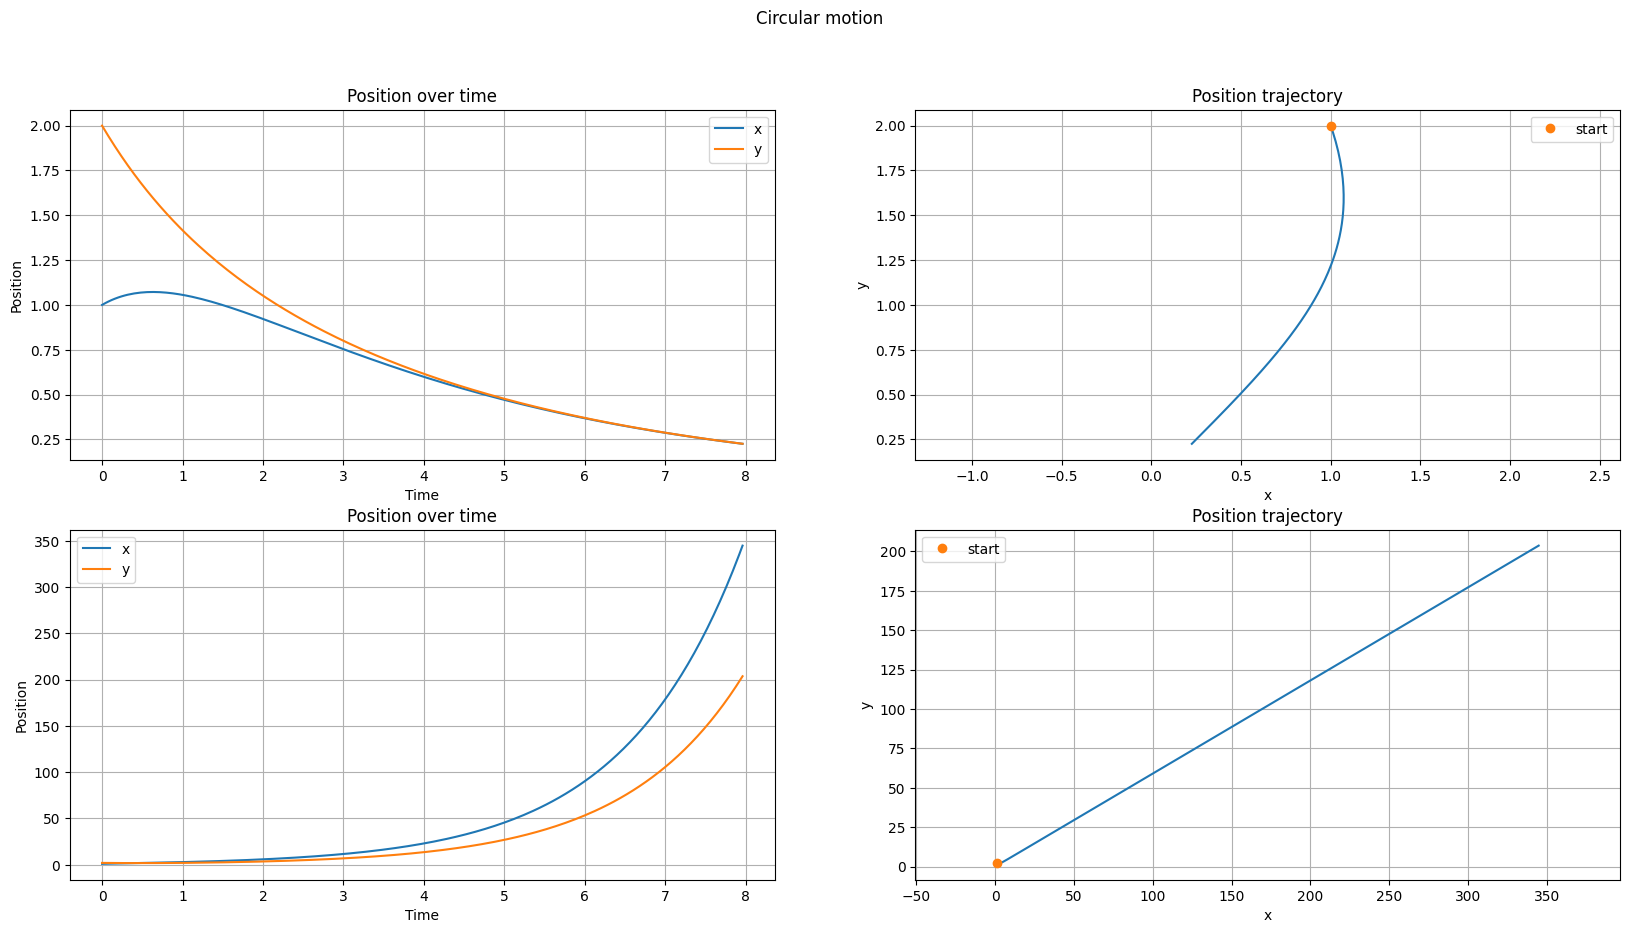

In [18]:
plt.figure(figsize=(20, 10))
plt.suptitle('Circular motion')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, ss_1.T[0], label='x')
plt.plot(time, ss_1.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(ss_1.T[0], ss_1.T[1])
plt.plot(ss_1[0].T[0], ss_1[0].T[1], 'o', label='start')
plt.legend()
plt.grid()
plt.axis('equal')

plt.subplot(2, 2, 3)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, ss_2.T[0], label='x')
plt.plot(time, ss_2.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 4)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(ss_2.T[0], ss_2.T[1])
plt.plot(ss_2[0].T[0], ss_2[0].T[1], 'o', label='start')
plt.grid()
plt.legend()
plt.axis('equal')


# Analysis of Simulation Results

The simulation results demonstrate fundamentally different behaviors for the two systems under consideration.

## System 1

- **Determinant Analysis**: The determinant of matrix A₁ is det(A₁) = 0.97 × 0.98 - 0.02 × 0.01 = 0.9506 - 0.0002 = 0.9504, which is less than 1.
- **Behavior Observed**: The top-left graphs show that both x and y components gradually decrease over time, approaching zero. This indicates a stable system that converges to the origin.
- **Phase Space**: The top-right trajectory shows a curved path that moves toward the origin, confirming the system's stability.

## System 2

- **Determinant Analysis**: The determinant of matrix A₂ is det(A₂) = 1.01 × 0.96 - 0.03 × 0.04 = 0.9696 - 0.0012 = 0.9684, which is less than 1.
- **Eigenvalue Properties**: Despite having a determinant less than 1, matrix A₂ has at least one eigenvalue greater than 1, making it unstable.
- **Behavior Observed**: The bottom-left graphs reveal that both x and y components initially remain near zero but eventually grow exponentially, with x growing faster than y. This indicates an unstable system.
- **Phase Space**: The bottom-right trajectory shows a straight line moving away from the origin, confirming the system's divergent behavior.

## Conclusion

This simulation effectively demonstrates how the eigenvalues of a transition matrix determine the stability of a dynamical system. While both systems have determinants less than 1 (indicating that phase space volume contracts over time), System 2 is unstable due to having at least one eigenvalue greater than 1, causing exponential growth in certain directions. This highlights the importance of analyzing not just the determinant but also the individual eigenvalues of the transition matrix to fully understand system dynamics.

# Conclusion

In this seminar, we successfully simulated the circular motion of a point using a state-space approach. By representing the system's state through position and velocity vectors and modeling the dynamics with transition matrices, we gained valuable insights into how linear systems evolve over time.

Our key findings include:

1. **Mathematical Representation**: We demonstrated how circular motion can be effectively modeled using state-space representation, where the transition matrix encapsulates the relationship between current and future states.

2. **Determinant Significance**: We discovered the crucial role of the transition matrix's determinant in determining system behavior. This single value provides critical information about stability and long-term evolution.

3. **Stability Analysis**: By comparing two systems with different transition matrices, we observed how eigenvalues greater than 1 lead to instability and divergent behavior, even when the determinant is less than 1.

4. **Visualization Power**: The dual representation of system behavior—both as time series and phase space trajectories—provided complementary perspectives that enhanced our understanding of the dynamics.

These findings have significant implications across various fields, including control systems, robotics, economic modeling, and population dynamics. The mathematical framework explored today serves as a foundation for understanding more complex systems and designing controllers that can stabilize naturally unstable processes.

Moving forward, this knowledge can be extended to explore non-linear systems, stochastic elements, and optimal control strategies. The intuition developed about how matrix properties relate to system behavior will prove invaluable in these more advanced contexts.

This seminar has bridged theoretical concepts of linear algebra with practical applications in dynamic systems, providing both analytical tools and intuitive understanding that will serve as a foundation for further exploration in this field.